In [2]:
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19
from keras.layers import normalization, AveragePooling2D, Dense, Input, Flatten, Dropout, GlobalAveragePooling2D, conv2
from keras.models import Sequential, Model, Functional
from keras.callbacks import TensorBoard

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import layers
import tensorflow as tf

#from google.colab import drive

import matplotlib.pyplot as plt
import streamlit as st


In [5]:
from collections import namedtuple
import altair as alt
import math
import pandas as pd
import streamlit as st

"""
# Welcome to Streamlit!
Edit `/streamlit_app.py` to customize this app to your heart's desire :heart:
If you have any questions, checkout our [documentation](https://docs.streamlit.io) and [community
forums](https://discuss.streamlit.io).
In the meantime, below is an example of what you can do with just a few lines of code:
"""


with st.echo(code_location='below'):
    total_points = st.slider("Number of points in spiral", 1, 5000, 2000)
    num_turns = st.slider("Number of turns in spiral", 1, 100, 9)

    Point = namedtuple('Point', 'x y')
    data = []

    points_per_turn = total_points / num_turns

    for curr_point_num in range(total_points):
        curr_turn, i = divmod(curr_point_num, points_per_turn)
        angle = (curr_turn + 1) * 2 * math.pi * i / points_per_turn
        radius = curr_point_num / total_points
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        data.append(Point(x, y))

    st.altair_chart(alt.Chart(pd.DataFrame(data), height=500, width=500)
                    .mark_circle(color='#0068c9', opacity=0.5)
                    .encode(x='x:Q', y='y:Q'))

AttributeError: module 'streamlit' has no attribute 'hello'

In [11]:
dire = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
train_direc = '/content/drive/MyDrive/banco_de_imagens/Bancoimagens/train'
test_direc = '/content/drive/MyDrive/banco_de_imagens/Bancoimagens/test'
val_direc = '/content/drive/MyDrive/banco_de_imagens/Bancoimagens/val'

In [4]:
Image_gen = ImageDataGenerator(rescale = 1/255, shear_range=10, zoom_range=0.3, horizontal_flip=True, vertical_flip=True,brightness_range=[0.5,2.0], width_shift_range = 0.2,rotation_range=20,fill_mode = 'nearest')
val_Datagen = ImageDataGenerator(rescale = 1/255)


In [3]:
train = Image_gen.flow_from_directory(train_direc,batch_size=32, class_mode='binary') #target_size=(224,224,3)

validation = Image_gen.flow_from_directory(val_direc,batch_size=2,class_mode='binary') #target_size=(224,224,3)

test = val_Datagen.flow_from_directory(test_direc,batch_size=2,class_mode='binary') #target_size=(224,224,3)

NameError: name 'Image_gen' is not defined

In [15]:
 # colocando todas as layers da vgg19
def vgg_layers():
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    vgg.trainable = False

    x = vgg.output          #outputs = [vgg.get_layer(name).output for name in layer_names]
    x = GlobalAveragePooling2D()(x)
    x = Dense(128,activation='relu')(x)

    predictions = Dense(1, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=vgg.input, outputs=predictions)        # model = tf.keras.Model([vgg.input],outputs)

    model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])     # Compile
    return model

In [16]:
model = vgg_layers()

In [17]:
#early stopping
stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) #verbose=2, patience=10

# Learing rate
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)


In [1]:
input_ = Input(shape=)

#block 1
hidden_1_1 = tf.keras.layers.conv2(32, (3,3), input_shape=(32, 32), activation='relu')
hidden_1_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

#block 2
hidden_2_1 = tf.keras.layers.conv2(64, activation='relu')
hidden_2_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

#block 3
hidden_3_1 = tf.keras.layers.conv2(128, activation='relu')
hidden_3_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

#block 4
hidden_4_1 = tf.keras.layers.conv2(256, activation='relu')
hidden_4_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

#block 5
hidden_5 = Flatten()

#Block 6
hidden_6 = Dense(128, activation='relu')

#block 7
hidden_7 = Dense(1, activation='sigmoid')

NameError: name 'Functional' is not defined

In [18]:
history = model.fit(train,epochs=30, validation_data=validation, steps_per_epoch=100, callbacks=[stopper,lr], batch_size=32)

Epoch 1/30
100/100 [==============================] - 176s 2s/step - loss: 0.5076 - accuracy: 0.7606 - val_loss: 0.8424 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/30
100/100 [==============================] - 112s 1s/step - loss: 0.4059 - accuracy: 0.8131 - val_loss: 0.7996 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/30
100/100 [==============================] - 100s 999ms/step - loss: 0.3853 - accuracy: 0.8228 - val_loss: 0.7710 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/30
100/100 [==============================] - 92s 920ms/step - loss: 0.3683 - accuracy: 0.8338 - val_loss: 0.5509 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 5/30
100/100 [==============================] - 89s 891ms/step - loss: 0.3392 - accuracy: 0.8537 - val_loss: 0.7273 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 6/30
100/100 [==============================] - 90s 894ms/step - loss: 0.3357 - accuracy: 0.8509 - val_loss: 0.6888 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/30
100/100 [==============================] - 8

Text(0, 0.5, 'Loss')

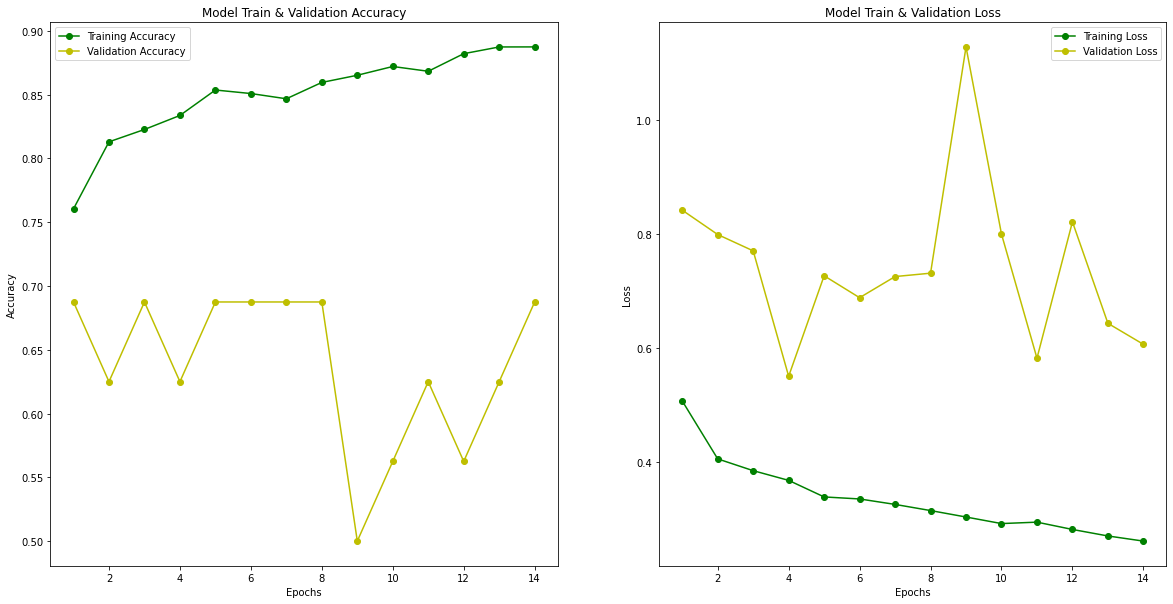

In [19]:
#Plot the training artifacts
fig , ax = plt.subplots(1, 2)
fig.set_size_inches(20, 10)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs, train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'yo-' , label = 'Validation Accuracy')
ax[0].set_title('Model Train & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs, val_loss , 'yo-' , label = 'Validation Loss')
ax[1].set_title('Model Train & Validation Loss')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

In [21]:
model.save_weights('primeiro_treino')

In [22]:
model.save('rede_xray')